In [25]:
import numpy as np
import matplotlib.pyplot as plt

def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    
pi = np.pi; h = 6.626e-34; c = 3.0e+8; k = 1.38e-23

In [26]:
def temp(wav,T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    return a/ ( (wav**5)*(np.exp(b) - 1.0) )

def temp2(wav,T,corr):
    wav = wav*corr
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    return a/ ( (wav**5)*(np.exp(b) - 1.0) )
## Firstly notice it is hard to tell a sum of blackbodies appart

In [27]:
from scipy.integrate import quad
def integrand(x, vphot):
    return np.sqrt(1-vphot**2) * 1/(1-vphot*np.cos(x))*np.sin(x)*np.cos(x)**2 * (3) 
def integral(x): 
    return np.sqrt(1-vphot**2) * 1/(1-vphot*np.cos(x))*np.sin(x)*np.cos(x)**2 * (3) 

vphot_list = []
beta_list = np.linspace(0.0,1,200)
for i in beta_list: 
    vphot = i
    vphot_list.append(quad(integral, 0, np.pi/2)[0])
    
#y = (3*(beta_list-2)*beta_list-)/(2*beta_list**3)

In [32]:
x_arr = np.linspace(0, np.pi/2, 50)
x_center = (x_arr[1:]+x_arr[:-1])/2
#for i in range(10): 
areas = 2*np.sin(x_center)*np.cos(x_center) * (x_arr[1]-x_arr[0])

vphot = 0.3
corr = 1/(1-vphot*np.cos(x_center)) * (1-vphot**2)**(1/2)

array([-0.03371947,  0.32732845])

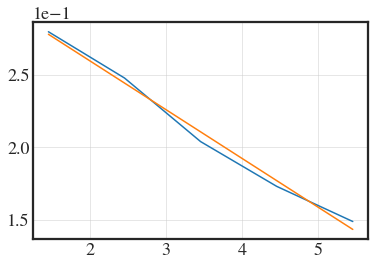

In [33]:
## velocity with time
n_days = np.array([126000, 212400, 298800, 385200,5.458*86400])/86400
v = np.array([0.2799025922000335, 0.24791265340880345, 0.20397601390780323, 
              0.17304530867385287, 0.1487510652639866])

plt.plot(n_days, v)
p = np.polyfit(n_days, v, 1)
plt.plot(n_days, n_days*p[0]+p[1] )
p

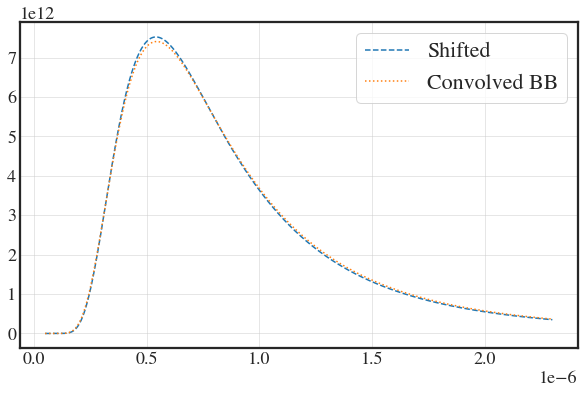

In [78]:
v_phot=0.28
vbb = v_phot
T = 4500
T_power = 0.56
wav = np.linspace(500e-10, 23000e-10,1000)

reset_plt(18,22)
plt.figure(figsize=(10,6))
#plt.plot(wav, temp(wav, T), label='Input') 
plt.plot(wav, temp(wav*np.average(corr,weights=areas), T), ls='--', alpha=1, label='Shifted') 
#np.average(corr, weights=areas)**4*
plt.plot(wav, np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas), 
         label='Convolved BB', ls='dotted')

#area
x_arr = np.linspace(0, np.pi/2, 100)
x_center = (x_arr[1:]+x_arr[:-1])/2
areas = 2*np.sin(x_center)*np.cos(x_center) * (x_arr[1]-x_arr[0])
t_0 = 24*3600*1.427

#from scipy.interpolate import interp1d
#beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
#inter = interp1d(beta, doppler)
corr = (1-vbb**2)**(1/2)*1/(1-vbb*np.cos(x_center))
    
#This includes the cooling of temperatures using Drout2017
t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
#T_n = T*np.ones_like(t) #
T_n = T*((t_0-t)/t_0)**(-T_power)
T_n_055 = T*((t_0-t)/t_0)**(-0.51)#0.56)
T_n_054 = T*((t_0-t)/t_0)**(-0.46)#0.54)
T_n_053 = T*((t_0-t)/t_0)**(-0.41)#52)
#T_n_04 = T*((t_0-t)/t_0)**(-0.4)
#T_n_02 = T*((t_0-t)/t_0)**(-0.2)

v_t = ((t_0-t)/86400)*p[0]+p[1]
corr = (1-v_t**2)**(1/2)*1/(1-v_t*np.cos(x_center))


#intensity = np.average([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)], axis=0, weights=areas)
#rat = (intensity[np.argmax(intensity)]/np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas)[np.argmax(intensity)])
#plt.plot(wav, intensity/rat, label='Temperature Weighted')

#from scipy.interpolate import interp1d
#beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
#inter = interp1d(beta, doppler)
#delta = inter(v_phot) 
#corr2 = delta**4
#corr = (1-v_phot**2)**(1/2)*1/(1-v_phot*np.cos(x_center))


plt.legend(frameon=True)

1.3121042518959274
0.7201682866327718
1.0175015750366176
0.8456998335478357


((0.61, 1.39), (0.0, 1.5707963267948966))

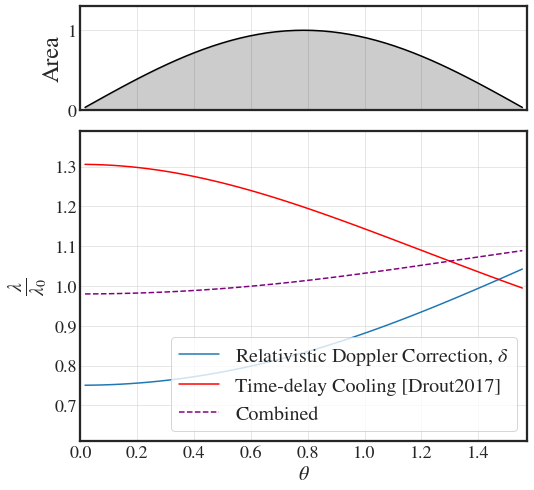

In [37]:
reset_plt(18,28)
fig,ax = plt.subplots(figsize=(8,8), nrows=2, gridspec_kw={'height_ratios': [1, 3]}, sharex=True)
ax[0].plot(x_center, areas/np.trapz(areas, x = x_center), color='k')
ax[0].fill_between(x_center, np.zeros_like(areas/np.trapz(areas, x = x_center)),
                     areas/np.trapz(areas, x = x_center), color='k', alpha=0.2)
ax[0].set_ylabel('Area', fontsize=24), plt.subplots_adjust(hspace = .1)
ax[0].set_ylim(0, 1.3)

peakwl = 2.898/T_n
print(peakwl[0]/peakwl[-1])

peakwl = 2.898/corr
print(peakwl[0]/peakwl[-1])
plt.plot(x_center, 1/corr, label=r'Relativistic Doppler Correction, $\delta$')

peakwl = 2.898/T_n / np.average(2.898/T_n/corr/(2.898/4500), weights=areas)
plt.plot(x_center, peakwl/(2.898/4500), label='Time-delay cooling', color='red' )
#plt.fill_between(x_center, 2.898/T_n_053/(2.898/4500), 
#                 2.898/T_n_055/(2.898/4500), color='red', alpha=0.2 )

peakwl = 2.898/T_n_054/corr / np.average(4500/T_n/corr, weights=areas)
plt.plot(x_center, peakwl/(2.898/4500), label='Combined', ls='--', color='purple' )

print(np.average( peakwl/(2.898/4500), weights=areas ))
print(np.average(1/corr, weights=areas) )
#peakwl = 2.898/T_n_04/corr
#plt.plot(x_center, peakwl/(2.898/4500) )

#peakwl = 2.898/T_n_02/corr
#plt.plot(x_center, peakwl/(2.898/4500) )

#plt.axhline(1/ratio, ls = '--', color = 'k', alpha = 0.5)
#plt.axhline(np.mean(peakwl/(2.898/4500)), ls = '--', color = 'k', alpha = 0.5)

plt.legend(frameon=True, fontsize=20)
plt.ylabel(r'$\frac{\lambda}{\lambda_0}$'), plt.xlabel(r'$\theta$', fontsize=20)
## ie shape of blackbody is 
plt.ylim(0.61, 1.39), plt.xlim(0, np.pi/2)#, plt.tight_layout()
#plt.savefig('Pictures/peak_lambda_near_unity.png', dpi=300)

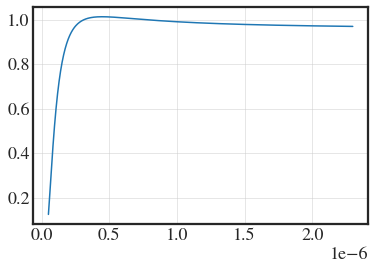

In [35]:
plt.plot(wav,temp(wav*np.average(corr,weights=areas), T)/np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas))

In [36]:
(1-vbb**2)**(1/2)*1/(1-vbb*np.cos(x_center)), (1-v_t**2)**(1/2)*1/(1-v_t*np.cos(x_center))

(array([1.33326673, 1.33273425, 1.33167112, 1.33008095, 1.32796916,
        1.32534288, 1.32221093, 1.31858373, 1.31447324, 1.30989283,
        1.30485724, 1.29938241, 1.29348542, 1.28718431, 1.28049802,
        1.27344623, 1.26604925, 1.25832786, 1.25030326, 1.24199686,
        1.23343026, 1.22462507, 1.21560281, 1.20638489, 1.19699241,
        1.18744615, 1.17776649, 1.16797333, 1.158086  , 1.14812328,
        1.13810329, 1.12804349, 1.11796065, 1.1078708 , 1.09778924,
        1.08773054, 1.07770848, 1.06773612, 1.05782576, 1.04798894,
        1.0382365 , 1.02857856, 1.01902453, 1.00958315, 1.00026253,
        0.9910701 , 0.98201273, 0.97309669, 0.96432771]),
 array([1.33344677, 1.33295168, 1.33196271, 1.33048224, 1.32851384,
        1.32606226, 1.32313341, 1.31973434, 1.31587325, 1.3115594 ,
        1.30680314, 1.30161586, 1.29600994, 1.28999869, 1.28359636,
        1.27681799, 1.26967944, 1.26219727, 1.25438871, 1.24627152,
        1.237864  , 1.22918485, 1.22025308, 1.211088  , 1.

In [37]:
t

array([8.39192186e+00, 7.54842027e+01, 2.09439317e+02, 4.09800222e+02,
       6.75885959e+02, 1.00679710e+03, 1.40142287e+03, 1.85844988e+03,
       2.37637231e+03, 2.95350336e+03, 3.58798789e+03, 4.27781605e+03,
       5.02083766e+03, 5.81477724e+03, 6.65724941e+03, 7.54577463e+03,
       8.47779488e+03, 9.45068933e+03, 1.04617897e+04, 1.15083951e+04,
       1.25877869e+04, 1.36972418e+04, 1.48340454e+04, 1.59955042e+04,
       1.71789570e+04, 1.83817851e+04, 1.96014218e+04, 2.08353610e+04,
       2.20811642e+04, 2.33364672e+04, 2.45989859e+04, 2.58665203e+04,
       2.71369585e+04, 2.84082794e+04, 2.96785552e+04, 3.09459521e+04,
       3.22087311e+04, 3.34652486e+04, 3.47139548e+04, 3.59533937e+04,
       3.71822007e+04, 3.83991015e+04, 3.96029094e+04, 4.07925225e+04,
       4.19669218e+04, 4.31251673e+04, 4.42663957e+04, 4.53898165e+04,
       4.64947089e+04])

In [38]:
np.sum(areas)

1.0001284839085478

In [39]:
np.trapz(areas, x = x_center)

0.03203609045325515

(0.0, 1.5707963267948966)

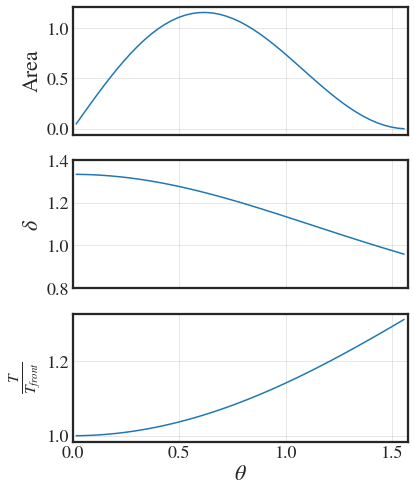

In [40]:
reset_plt(18,22)
fig,ax = plt.subplots(figsize=(6,8),nrows=3, sharex=True)
ax[0].plot(x_center, areas/np.trapz(areas, x = x_center)), ax[0].set_ylabel('Area')
ax[1].plot(x_center, corr)   , ax[1].set_ylabel(r'$\delta$')
ax[2].plot(x_center, T_n/4500)   , ax[2].set_ylabel(r'$\frac{T}{T_{front}}$')
plt.xlabel(r'$\theta$'), ax[1].set_ylim(0.8, 1.4)
plt.xlim(0, np.pi/2)
#plt.yscale('log'), plt.xscale('log')

In [41]:
#np.average(peakwl, weights=areas) / peakwl[0], np.std(peakwl)/ peakwl[0]

In [42]:
from scipy.interpolate import interp1d

beta1, doppler1 = np.loadtxt('doppler_wo_prolate_inv.txt')
inter = interp1d(beta1, doppler1)
ratio = inter(0.278)

1.3148741607035235
0.7182858598594978


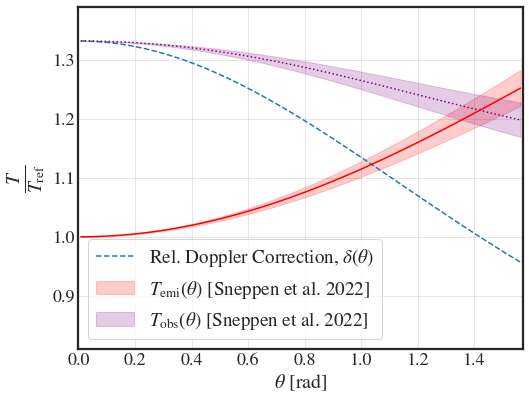

In [85]:
reset_plt(18,28)
plt.figure(figsize=(8,6.2))

peakwl = 2.898/T_n
print(peakwl[0]/peakwl[-1])

peakwl = 2.898/corr
print(peakwl[0]/peakwl[-1])
plt.plot(x_center, corr, label=r'Rel. Doppler Correction, $\delta(\theta)$', ls='--')

peakwl = 2.898/T_n_054
plt.plot(x_center, 1/(peakwl/(2.898/4500)), color='red' )
plt.fill_between(x_center, 1/(2.898/T_n_053/(2.898/4500)), 
                 1/(2.898/T_n_055/(2.898/4500)), color='red', alpha=0.2, label=r'$T_{\rm emi}(\theta)$ [Sneppen et al. 2022]', )

#peakwl = 2.898/T_n_054/corr
plt.plot(x_center, corr/(peakwl/(2.898/4500)), ls='dotted', color='purple' )
plt.fill_between(x_center, corr/(2.898/T_n_053/(2.898/4500)), 
                 corr/(2.898/T_n_055/(2.898/4500)), color='purple', alpha=0.2, label=r'$T_{\rm eff}(\theta)$ [Sneppen et al. 2022]' )

#peakwl = 2.898/T_n_04/corr
#plt.plot(x_center, peakwl/(2.898/4500) )

#peakwl = 2.898/T_n_02/corr
#plt.plot(x_center, peakwl/(2.898/4500) )

#plt.axhline(1/ratio, ls = '--', color = 'k', alpha = 0.5)
#plt.axhline(np.mean(peakwl/(2.898/4500)), ls = '--', color = 'k', alpha = 0.5)

plt.legend(frameon=True, fontsize=19.)
#plt.xticks([0, np.pi/4, np.pi/2], [0, r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$'] )
plt.ylabel(r'$\frac{T}{T_{\rm ref}}$'), plt.xlabel(r'$\theta$ [rad]', fontsize=20)
## ie shape of blackbody is 
plt.ylim(0.81, 1.39), plt.xlim(0, np.pi/2), plt.tight_layout()
plt.savefig('Pictures/Temperature_surface_1stepoch_1.png', dpi=300)

In [53]:
v_phot=0.15
vbb = v_phot
T = 3000
T_power = 0.56
wav = np.linspace(500e-10, 23000e-10,1000)

#area
x_arr = np.linspace(0, np.pi/2, 50)
x_center = (x_arr[1:]+x_arr[:-1])/2
areas = 3*np.sin(x_center)*np.cos(x_center)**2 * (x_arr[1]-x_arr[0])
t_0 = 24*3600*4.4

#from scipy.interpolate import interp1d
#beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
#inter = interp1d(beta, doppler)
corr = (1-vbb**2)**(1/2)*1/(1-vbb*np.cos(x_center))
    
#This includes the cooling of temperatures using Drout2017
t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
#T_n = T*np.ones_like(t) #
T_n = T*((t_0-t)/t_0)**(-T_power)
T_n_055 = T*((t_0-t)/t_0)**(-0.56)
T_n_054 = T*((t_0-t)/t_0)**(-0.54)
T_n_053 = T*((t_0-t)/t_0)**(-0.52)
T_n_04 = T*((t_0-t)/t_0)**(-0.4)
T_n_02 = T*((t_0-t)/t_0)**(-0.2)

v_t = ((t_0-t)/86400)*p[0]+p[1]
corr = (1-v_t**2)**(1/2)*1/(1-v_t*np.cos(x_center))


1.11301889253299
0.8195329628283287
1.0010235203145013
0.8767806197643259


((0.61, 1.39), (0.0, 1.5707963267948966))

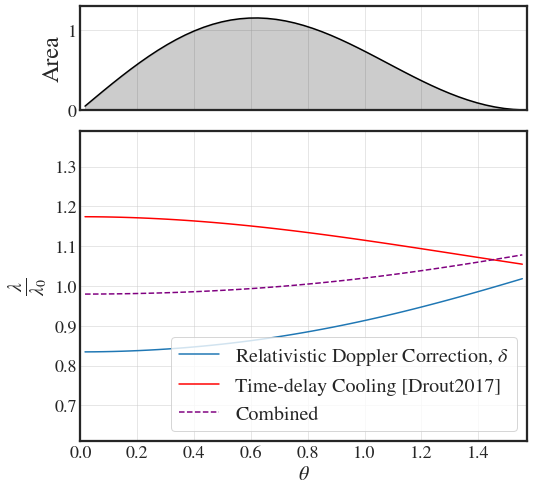

In [54]:
reset_plt(18,28)
fig,ax = plt.subplots(figsize=(8,8), nrows=2, gridspec_kw={'height_ratios': [1, 3]}, sharex=True)
ax[0].plot(x_center, areas/np.trapz(areas, x = x_center), color='k')
ax[0].fill_between(x_center, np.zeros_like(areas/np.trapz(areas, x = x_center)),
                     areas/np.trapz(areas, x = x_center), color='k', alpha=0.2)
ax[0].set_ylabel('Area', fontsize=24), plt.subplots_adjust(hspace = .1)
ax[0].set_ylim(0, 1.3)

peakwl = 2.898/T_n
print(peakwl[0]/peakwl[-1])

peakwl = 2.898/corr
print(peakwl[0]/peakwl[-1])
plt.plot(x_center, 1/corr, label=r'Relativistic Doppler Correction, $\delta$')

peakwl = 2.898/T_n / np.average(2.898/T_n/corr/(2.898/4500), weights=areas)
plt.plot(x_center, peakwl/(2.898/4500), label='Time-delay Cooling [Drout2017]', color='red' )
#plt.fill_between(x_center, 2.898/T_n_053/(2.898/4500), 
#                 2.898/T_n_055/(2.898/4500), color='red', alpha=0.2 )

peakwl = 2.898/T_n_054/corr / np.average(4500/T_n/corr, weights=areas)
plt.plot(x_center, peakwl/(2.898/4500), label='Combined', ls='--', color='purple' )

print(np.average( peakwl/(2.898/4500), weights=areas ))
print(np.average(1/corr, weights=areas) )
#peakwl = 2.898/T_n_04/corr
#plt.plot(x_center, peakwl/(2.898/4500) )

#peakwl = 2.898/T_n_02/corr
#plt.plot(x_center, peakwl/(2.898/4500) )

#plt.axhline(1/ratio, ls = '--', color = 'k', alpha = 0.5)
#plt.axhline(np.mean(peakwl/(2.898/4500)), ls = '--', color = 'k', alpha = 0.5)

plt.legend(frameon=True, fontsize=20)
plt.ylabel(r'$\frac{\lambda}{\lambda_0}$'), plt.xlabel(r'$\theta$', fontsize=20)
## ie shape of blackbody is 
plt.ylim(0.61, 1.39), plt.xlim(0, np.pi/2)#, plt.tight_layout()
#plt.savefig('Pictures/peak_lambda_surface_1stepoch_2.png', dpi=300)

In [50]:
2.898/T_n_054/corr/(2.898/4500)

array([0.7499081 , 0.74996189, 0.75006952, 0.75023106, 0.75044665,
       0.75071643, 0.75104058, 0.75141926, 0.75185266, 0.7523409 ,
       0.7528841 , 0.75348232, 0.75413551, 0.75484358, 0.7556063 ,
       0.75642333, 0.75729418, 0.75821821, 0.75919464, 0.7602225 ,
       0.76130064, 0.76242773, 0.76360224, 0.76482248, 0.76608656,
       0.76739239, 0.76873773, 0.77012015, 0.77153709, 0.77298582,
       0.77446348, 0.7759671 , 0.7774936 , 0.77903981, 0.7806025 ,
       0.78217837, 0.78376411, 0.78535637, 0.7869518 , 0.78854708,
       0.79013893, 0.7917241 , 0.79329942, 0.7948618 , 0.79640824,
       0.79793585, 0.79944186, 0.80092365, 0.8023787 ])

1.188149369749738
0.719279734341105


((0.68, 1.2), (0.0, 1.5707963267948966))

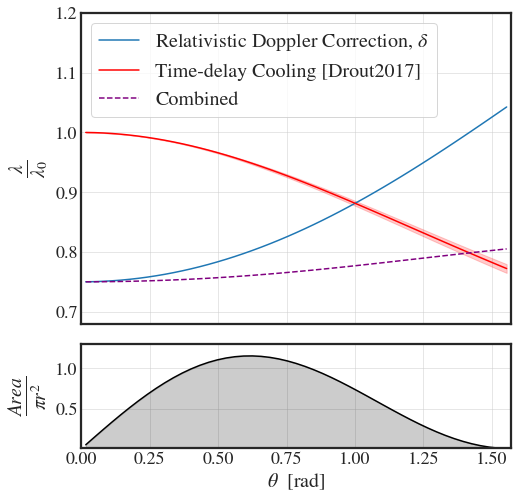

In [35]:
reset_plt(18,28)
fig,ax = plt.subplots(figsize=(7.7,8), nrows=2, gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
ax[1].plot(x_center, areas/np.trapz(areas, x = x_center), color='k')
ax[1].fill_between(x_center, np.zeros_like(areas/np.trapz(areas, x = x_center)),
                     areas/np.trapz(areas, x = x_center), color='k', alpha=0.2)
ax[1].set_ylabel(r'$\frac{Area}{\pi r^2}$', fontsize=28), plt.subplots_adjust(hspace = .1)
ax[1].set_ylim(0.01, 1.3)

peakwl = 2.898/T_n
print(peakwl[0]/peakwl[-1])

peakwl = 2.898/corr
print(peakwl[0]/peakwl[-1])
ax[0].plot(x_center, 1/corr, label=r'Relativistic Doppler Correction, $\delta$')

peakwl = 2.898/T_n_054
ax[0].plot(x_center, peakwl/(2.898/4500), label='Time-delay Cooling [Drout2017]', color='red' )
ax[0].fill_between(x_center, 2.898/T_n_053/(2.898/4500), 
                 2.898/T_n_055/(2.898/4500), color='red', alpha=0.2 )

peakwl = 2.898/T_n_054/corr
ax[0].plot(x_center, peakwl/(2.898/4500), label='Combined', ls='--', color='purple' )

#peakwl = 2.898/T_n_04/corr
#plt.plot(x_center, peakwl/(2.898/4500) )

#peakwl = 2.898/T_n_02/corr
#plt.plot(x_center, peakwl/(2.898/4500) )

#plt.axhline(1/ratio, ls = '--', color = 'k', alpha = 0.5)
#plt.axhline(np.mean(peakwl/(2.898/4500)), ls = '--', color = 'k', alpha = 0.5)

ax[0].legend(frameon=True, fontsize=20)
ax[0].set_ylabel(r'$\frac{\lambda}{\lambda_0}$'), ax[1].set_xlabel(r'$\theta \ $ [rad]', fontsize=20)
## ie shape of blackbody is 
ax[0].set_ylim(0.68, 1.2), plt.xlim(0, np.pi/2)#, plt.tight_layout()
#plt.savefig('Pictures/peak_lambda_surface_1stepoch_2.png', dpi=300)

In [36]:
corr2 = peakwl/(2.898/4500)


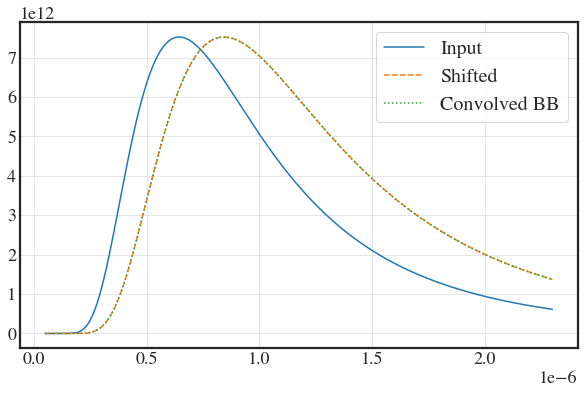

In [37]:
plt.figure(figsize=(10,6))
plt.plot(wav, temp(wav, 4500), label='Input') 
plt.plot(wav, temp(wav*np.average(corr2, axis=0, weights=areas ), T), ls='--', alpha=1, label='Shifted') 
#np.average(corr, weights=areas)**4*
plt.plot(wav, np.average([temp(wav*i, T) for i in corr2], axis=0, weights=areas), 
         label='Convolved BB', ls='dotted')
plt.legend(fontsize=20, frameon=True); 

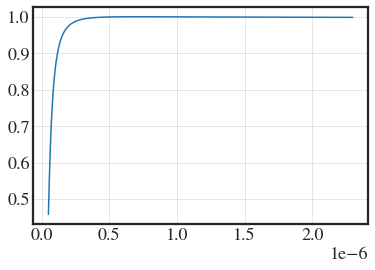

In [38]:
ratio = temp2(wav, T, np.average(corr2, axis=0, weights=areas ))/np.average([temp2(wav, T, i) for i in corr2], axis=0, weights=areas)
plt.plot(wav,ratio)

In [56]:
corr2

array([0.74990849, 0.74996539, 0.75007922, 0.75025006, 0.75047799,
       0.75076314, 0.75110564, 0.75150562, 0.75196318, 0.75247842,
       0.75305138, 0.75368203, 0.75437028, 0.75511595, 0.75591872,
       0.75677818, 0.75769377, 0.75866476, 0.75969029, 0.76076931,
       0.76190059, 0.76308272, 0.76431411, 0.76559299, 0.76691738,
       0.76828515, 0.76969399, 0.7711414 , 0.77262476, 0.77414127,
       0.77568804, 0.77726203, 0.77886011, 0.78047906, 0.78211559,
       0.78376637, 0.78542802, 0.78709716, 0.7887704 , 0.79044435,
       0.79211569, 0.79378113, 0.79543743, 0.79708147, 0.79871018,
       0.80032063, 0.80191   , 0.80347558, 0.80501484])

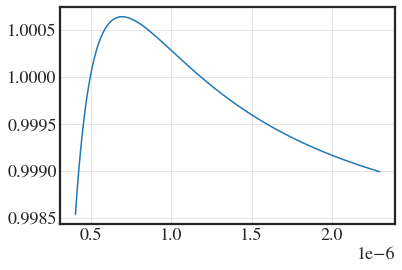

In [39]:
x = temp(wav*np.average(corr2, axis=0, weights=areas ), T)
y = np.average([temp(wav*i, T) for i in corr2], axis=0, weights=areas)
plt.plot(wav[wav>4000e-10], x[wav>4000e-10]/y[wav>4000e-10])


In [244]:
ratio = np.average(corr, weights=areas)

In [246]:
(np.mean(2.898/T_n_054/corr/(2.898/4500)), np.mean(2.898/T_n_04/corr/(2.898/4500)) ), 1/ratio

((0.7708098826634897, 0.7912884068168295), 0.8171431770328969)

In [249]:
1/( 0.793/0.82 )**2 

1.0692550993958803

In [248]:
1/( 0.772/0.82 )**2 

1.1282182072001932

In [208]:
(ratio/np.mean(2.898/T_n_04/corr/(2.898/4500)))**2

2.3625461571810704

In [198]:
T_n/T_n[-1]*corr

array([1.02723258, 1.0271302 , 1.02692584, 1.02662028, 1.0262147 ,
       1.02571066, 1.02511007, 1.02441523, 1.02362873, 1.02275353,
       1.02179286, 1.02075024, 1.01962945, 1.01843449, 1.01716961,
       1.01583918, 1.01444778, 1.01300011, 1.01150095, 1.00995519,
       1.00836777, 1.00674365, 1.00508779, 1.00340517, 1.00170069,
       0.99997923, 0.99824556, 0.99650438, 0.99476027, 0.99301769,
       0.99128095, 0.98955422, 0.98784151, 0.98614664, 0.98447326,
       0.98282485, 0.98120468, 0.97961582, 0.97806115, 0.97654334,
       0.97506485, 0.97362794, 0.97223466, 0.97088686, 0.96958617,
       0.96833404, 0.9671317 , 0.96598018, 0.96488033])

In [193]:
new_corr = np.average((corr*T_n_04)/4500, weights=areas)
new_corr, ratio


(1.2806777754253358, array(1.21897927))

In [194]:
43.3/(new_corr/ratio)**2, 67.1*(new_corr/ratio)**2

(39.22841762106092, 74.06442003513634)

In [186]:
44.4/1.12

39.64285714285714

(0.0, 2.0)

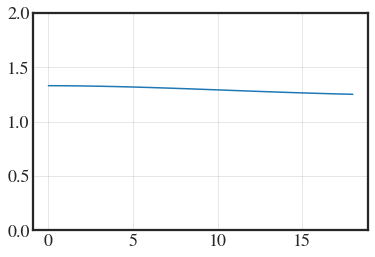

In [116]:
plt.plot((corr*T_n)/4500)
plt.ylim(0,2)

### Plotting a Blackbody

(1e-07, 2.5e-06)

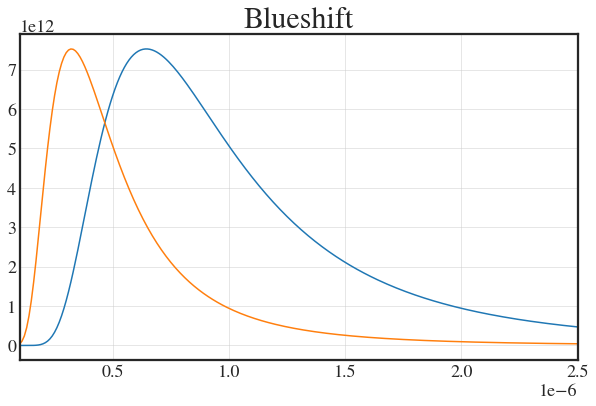

In [156]:
plt.figure(figsize=(10,6)), plt.title('Blueshift', fontsize=30)
plt.plot(wav, temp2(wav, T, 1), label='Input') 
plt.plot(wav, temp2(wav, T, 2), label='Input') 
plt.xlim(1000e-10, 25000e-10)

In [151]:
np.trapz(temp2(wav, T, 2)*2**5, x = wav)/np.trapz(temp2(wav, T, 1), x = wav)

16.0027614021335

In [152]:
wav = np.linspace(100e-10, 200000e-10,2000)
np.trapz(temp2(wav, T*4, 1)/4**4, x = wav)/np.trapz(temp2(wav, T, 1), x = wav)

1.0001948764202968

((1e-07, 2.5e-06), Text(0.5, 1.0, 'Temperature'))

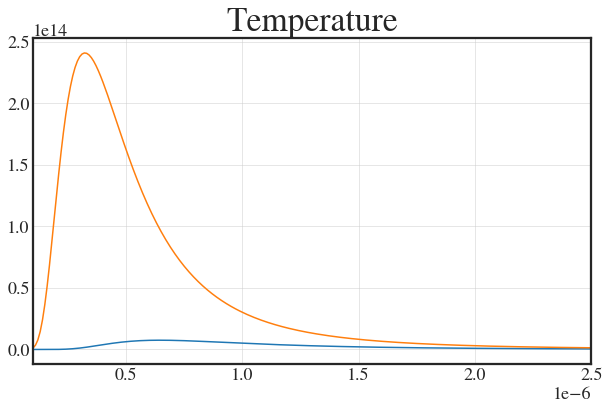

In [159]:
plt.figure(figsize=(10,6))
plt.plot(wav, temp2(wav, T  , 1), label='Input') 
plt.plot(wav, temp2(wav, T*2, 1), label='Input') 
plt.xlim(1000e-10, 25000e-10), plt.title('Temperature')

In [91]:
1/new_corr

0.7671982602828923

In [154]:
#times = [1.43, 20.42]
vphots = np.linspace(0,0.9,100) #[0.278, 0.278]#0.245]
new_corr = []
for v_phot in vphots: 
    #v_phot=0.278
    vbb = v_phot
    T = 4500
    T_power = 0.54
    wav = np.linspace(500e-10, 23000e-10,1000)

    #area
    x_arr = np.linspace(0, np.pi/2, 20)
    x_center = (x_arr[1:]+x_arr[:-1])/2
    areas = 3*np.sin(x_center)*np.cos(x_center)**2 * (x_arr[1]-x_arr[0])
    t_0 = 24*3600*time


    corr = (1-vbb**2)**(1/2)*1/(1-vbb*np.cos(x_center))
    
    #This includes the cooling of temperatures using Drout2017
    t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
    #T_n = T*np.ones_like(t) #
    #print(t)
    T_n = T*((t_0-t)/t_0)**(-T_power)
    
    #print( T_n/4500 )
    #intensity = np.average([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)], axis=0, weights=areas)
    #rat = (intensity[np.argmax(intensity)]/np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas)[np.argmax(intensity)])

    new_corr.append(np.average((corr*T_n)/4500, weights=areas))
    
#plt.plot(wav, intensity/rat, label='Temperature Weighted')

#from scipy.interpolate import interp1d
#beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
#inter = interp1d(beta, doppler)
#delta = inter(v_phot) 
#corr2 = delta**4
#corr = (1-v_phot**2)**(1/2)*1/(1-v_phot*np.cos(x_center))


#plt.legend(frameon=True)

<ipython-input-154-128babca0640>:24: RuntimeWarning: invalid value encountered in power
  T_n = T*((t_0-t)/t_0)**(-T_power)


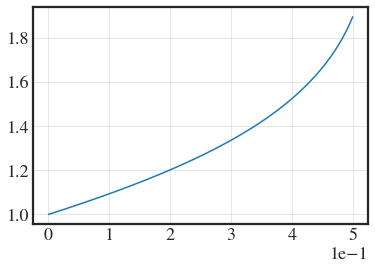

In [155]:
plt.plot(vphots, new_corr)

np.savetxt('doppler_incl_temp_54.txt', [vphots, new_corr])

In [67]:
from scipy.interpolate import interp1d
beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
inter = interp1d(beta, doppler)
inter(0.28)

array(1.22065126)

In [81]:
corr

array([1.28663008, 1.27392929, 1.24963295, 1.21573656, 1.17477075,
       1.12941602, 1.0821829 , 1.03520699, 0.99016201])

1.2185635920252051
0.7695778509144997


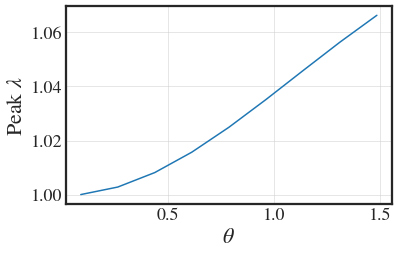

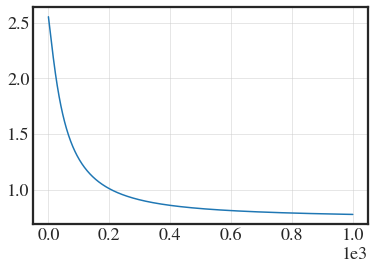

In [81]:
conv = np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas)

plt.plot( (intensity/np.max(intensity))/(conv/np.max(conv)) )

In [162]:
corr, np.average(corr, weights=areas), np.std(corr)

(array([1.28935898, 1.27649593, 1.25189679, 1.21759462, 1.17616427,
        1.13032825, 1.08263071, 1.03523016, 0.9898128 ]),
 1.1961059077197136,
 0.10204359225650322)

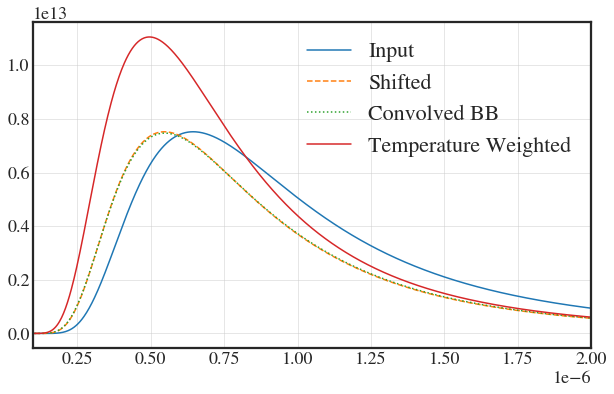

In [164]:
reset_plt(18,22)
plt.figure(figsize=(10,6))
plt.plot(wav, temp(wav, T), label='Input') 
plt.plot(wav, temp(wav*np.average(corr,weights=areas), T), ls='--', alpha=1, label='Shifted') 
#np.average(corr, weights=areas)**4*
plt.plot(wav, np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas), 
         label='Convolved BB', ls='dotted')

#area
x_arr = np.linspace(0, np.pi/2, 10)
x_center = (x_arr[1:]+x_arr[:-1])/2
areas = 3*np.sin(x_center)*np.cos(x_center)**2 * (x_arr[1]-x_arr[0])
t_0 = 24*3600*1.4


v_phot=0.28
vbb = v_phot
T = 4500
wav = np.linspace(500e-10, 23000e-10,1000)
corr = (1-vbb**2)**(1/2)*1/(1-vbb*np.cos(x_center))
    
#This includes the cooling of temperatures using Drout2017
t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
#T_n = T*np.ones_like(t) #
T_n = T*((t_0-t)/t_0)**(-0.54)
intensity = np.average([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)], axis=0, weights=areas)

plt.plot(wav, intensity, label='Temperature Weighted')

#from scipy.interpolate import interp1d
#beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
#inter = interp1d(beta, doppler)
#delta = inter(v_phot) 
#corr2 = delta**4
#corr = (1-v_phot**2)**(1/2)*1/(1-v_phot*np.cos(x_center))
plt.xlim(1000e-10, 20000e-10)

plt.legend()

In [166]:
corr**5

array([4.18294956, 3.9455571 , 3.52355883, 2.9998924 , 2.45729317,
       1.9566582 , 1.53050064, 1.18772193, 0.92258255])

total = 5.542682603051308
0.22650463532470647
0.6781077318219517
1.1164836728913634
1.5035608714021305
1.762821590557425
1.7839131760910125
1.4650087347816727
0.8168288252545298
0.13477201780126813
Sum =  9.488001255926061


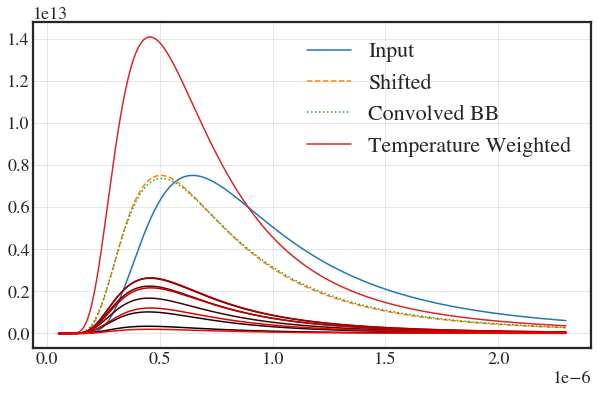

In [70]:
v_phot=0.35
vbb = v_phot
T = 4500
wav = np.linspace(500e-10, 23000e-10,1000)

reset_plt(18,22)
plt.figure(figsize=(10,6))
plt.plot(wav, temp(wav, T), label='Input') 
plt.plot(wav, temp(wav*np.average(corr,weights=areas), T), ls='--', alpha=1, label='Shifted') 
#np.average(corr, weights=areas)**4*
plt.plot(wav, np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas), 
         label='Convolved BB', ls='dotted')

print('total =', np.sum(np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas)*(wav[1]-wav[0]))*1e-6)


#area
x_arr = np.linspace(0, np.pi/2, 10)
x_center = (x_arr[1:]+x_arr[:-1])/2
areas = 3*np.sin(x_center)*np.cos(x_center)**2 * (x_arr[1]-x_arr[0])
t_0 = 24*3600*1.4

corr = (1-vbb**2)**(1/2)*1/(1-vbb*np.cos(x_center))
    
#This includes the cooling of temperatures using Drout2017
t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
#T_n = T*np.ones_like(t) #
T_n = T*((t_0-t)/t_0)**(-0.54)
intensity = np.average([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)], axis=0, weights=areas)
plt.plot(wav, intensity, label='Temperature Weighted')


intensity = np.array([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)])*areas[:,None]
summen = 0
for i in range(9):
    plt.plot(wav, intensity[i], color=[i/8, 0, 0])
    print(np.sum(intensity[i]*(wav[1]-wav[0]))*1e-6)
    summen +=np.sum(intensity[i]*(wav[1]-wav[0]))*1e-6
print('Sum = ',summen)
#from scipy.interpolate import interp1d
#beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
#inter = interp1d(beta, doppler)
#delta = inter(v_phot) 
#corr2 = delta**4
#corr = (1-v_phot**2)**(1/2)*1/(1-v_phot*np.cos(x_center))


plt.legend()

In [77]:
10**4/86000

0.11627906976744186

In [11]:
reset_plt(18,22)
plt.figure(figsize=(10,6))

#area
x_arr = np.linspace(0, np.pi/2, 10)
x_center = (x_arr[1:]+x_arr[:-1])/2
areas = 3*np.sin(x_center)*np.cos(x_center)**2 * (x_arr[1]-x_arr[0])
t_0 = 24*3600*1.4

corr = (1-vbb**2)**(1/2)*1/(1-vbb*np.cos(x_center))
    
#This includes the cooling of temperatures using Drout2017
t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
#T_n = T*np.ones_like(t) #
T_n = T*((t_0-t)/t_0)**(-0.54)
intensity = np.average([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)], axis=0, weights=areas)
#plt.plot(wav, intensity, label='Temperature Weighted')

x = np.zeros_like(intensity)

intensity = np.array([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)])*areas[:,None]
for i in range(9):
    plt.plot(wav, intensity[i], color=[i/8, 0, 0])
    print(np.sum(intensity[i]*(wav[1]-wav[0]))*1e-6)
    x += intensity[i]
#plt.plot(wav, x, label='Temperature Weighted')


NameError: name 'wav' is not defined

<Figure size 720x432 with 0 Axes>

In [55]:
areas

array([0.04528799, 0.12643939, 0.18176   , 0.20152037, 0.18512012,
       0.14110609, 0.08475608, 0.03387933, 0.00396219])

In [56]:
np.sum(areas)

1.0038315658567054

(3.6e-07, 2.3e-06)

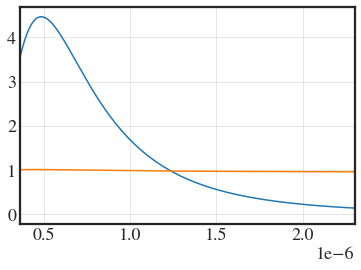

In [127]:
plt.plot(wav, intensity/np.average([temp2(wav, T, i) for i in corr]) ) 
#plt.plot(wav, intensity/temp(wav, T))
plt.plot(wav,  temp(wav*np.average(corr,weights=areas), T)/np.average([temp2(wav, T, i) for i in corr],
                                                                      axis=0, weights=areas) ) 
    
plt.xlim(3600e-10, 23000e-10)
#plt.ylim(1,1.5)
#plt.yscale('log') 

In [99]:
corr2

1.3410730620713258

In [100]:
reset_plt(18,20)
plt.figure(figsize=(10,6))

plt.plot( X, temp(X, 5000) , label='Input BB')
plt.plot( X, temp(X, 5000*np.average(corr,weights=areas)), label='Shifted BB', ls='--') 
#plt.plot( X, np.sum([temp(X, 5000)*i for i in corr*areas],axis=0) )
#plt.plot( X, np.sum([temp(X, 5000*i  ) for i in corr], axis=0) )

plt.plot( X, np.average([temp(X, 5000*i) for i in corr], axis=0, weights=areas), label='Convolved BB', ls='dotted')
plt.legend(frameon=True)
plt.xlabel('Wavelength [m]'), plt.ylabel('Flux') 

#plt.savefig('Pictures/Convolved_BB_example.png', dpi=300)

NameError: name 'X' is not defined

<Figure size 720x432 with 0 Axes>

In [62]:
np.average([temp(X*i, 5000) for i in corr], axis=0, weights=areas)/temp(X*np.average(corr,weights=areas), 5000)

array([1.01376841, 0.99679173, 0.98971456, 0.98749246, 0.98775409,
       0.98929424, 0.99146785, 0.99391865, 0.99644712, 0.99894203,
       1.0013431 , 1.00361989, 1.00575951, 1.00775934, 1.00962261,
       1.01135578, 1.01296691, 1.01446467, 1.01585776, 1.01715463,
       1.01836321, 1.01949091, 1.02054453, 1.0215303 , 1.02245389,
       1.02332045, 1.02413466, 1.02490074, 1.02562252, 1.02630349,
       1.02694679, 1.02755528, 1.02813155, 1.02867797, 1.02919667,
       1.02968963, 1.03015861, 1.03060527, 1.03103109, 1.03143744,
       1.03182558, 1.03219666, 1.03255175, 1.03289182, 1.03321778,
       1.03353047, 1.03383065, 1.03411905, 1.03439632, 1.03466307])

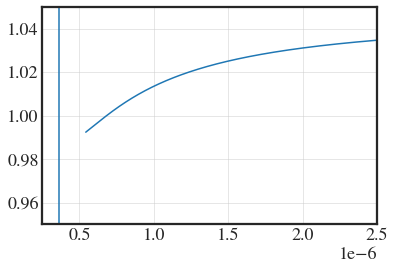

In [68]:
ratio = np.average([temp(X*i, 5000) for i in corr], axis=0, weights=areas)/temp(X*np.average(corr,weights=areas), 5000)
plt.plot(X[130:], ratio[130:])
plt.ylim(0.95, 1.05), plt.xlim(min(X), max(X))
plt.axvline(3600e-10)

In [8]:
X = np.linspace(2500e-10, 25000e-10, 100000)

1.0023044352944952
1.0113618458303815
1.031898590804035


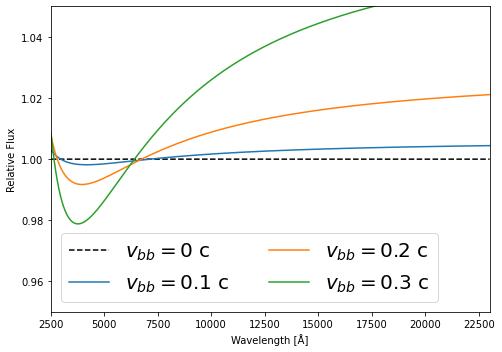

In [9]:
plt.figure(figsize=(7,5))

plt.plot(X[80:]*1e10, np.ones_like(X[80:]), label=r'$v_{bb} = 0 $ c', ls='--', color='k')

for vphot in [0.1,0.2,0.3]: 
    corr = (1-vphot**2)**(1/2)*1/(1-vphot*np.cos(x_center))
    ratio = np.average([temp(X*i, 5400) for i in corr], axis=0, weights=areas)/temp(X*np.average(corr,weights=areas), 5400)

    plt.plot(X[80:]*1e10, ratio[80:], label=r'$v_{bb} = $'+str(vphot)+' c')
    print(np.average(ratio[130:]))
plt.xlabel('Wavelength [Å]'), plt.ylabel('Relative Flux'), plt.tight_layout() 
#plt.axvline(4000, ls='--', color='k')
plt.xlim(2500, 23000), plt.ylim(0.95, 1.05)

plt.legend(fontsize=20, frameon=True, ncol=2)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))

#plt.savefig('Pictures/Convolved_BB_example_ratio_new.png', dpi=300)

1.0022223289879428
1.008827988203803
1.019729314030568


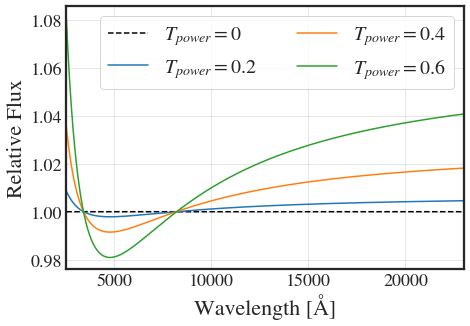

In [24]:
plt.figure(figsize=(7,5))
plt.plot(X[80:]*1e10, np.ones_like(X[80:]), label=r'$T_{power} = 0 $', ls='--', color='k')

for t_power in [0.2, 0.4, 0.6]: 
    vphot=0.3
    vbb = vphot

    corr = (1-vphot**2)**(1/2)*1/(1-vphot*np.cos(x_center))
    
    #This includes the cooling of temperatures using Drout2017
    t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
    #T_n = T*np.ones_like(t) #
    T_n = T*((t_0-t)/t_0)**(-t_power)
    corr2 =  ((T_n/4500)/np.average(T_n/4500)) #*corr
    ratio = np.average([temp(X*i, 5000) for i in corr2], axis=0, weights=areas)/temp(X*np.average(corr2,weights=areas), 5000)

    plt.plot(X[80:]*1e10, ratio[80:], label=r'$T_{power} = $'+str(t_power))
    print(np.average(ratio[130:]))
plt.xlabel('Wavelength [Å]'), plt.ylabel('Relative Flux'), plt.tight_layout() 
#plt.axvline(4000, ls='--', color='k')
plt.xlim(2500, 23000)#, plt.ylim(0.95, 1.05)

plt.legend(fontsize=20, frameon=True, ncol=2)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))

#plt.savefig('Pictures/Convolved_BB_example_ratio_new.png', dpi=300)

1.0015161041873961
1.005960185592274
1.013183356157445
1.023045579031794
1.0014669684877204
1.0074330591775744
1.0215428159208728
1.050381971061873


(Text(0, 0.5, 'Relative Flux'),
 Text(0.5, 0, 'Wavelength [Å]'),
 Text(0.5, 0, 'Wavelength [Å]'))

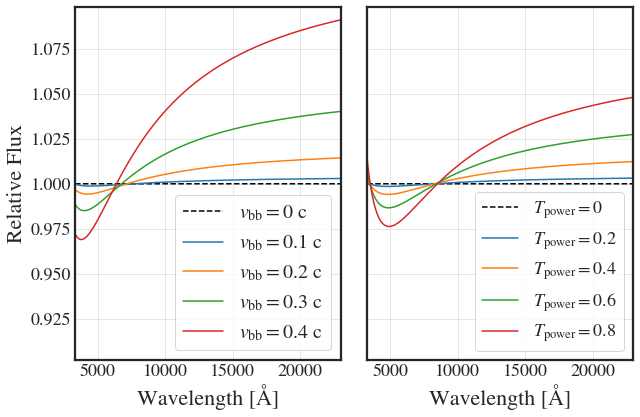

In [22]:
T = 5000

fig,ax = plt.subplots(figsize=(10,6.5), ncols=2, sharey=True)
plt.plot(X[80:]*1e10, np.ones_like(X[80:]), label=r'$T_{\rm power} = 0 $', ls='--', color='k')

for t_power in [0.2, 0.4, 0.6, 0.8]: 
    vphot=0.3
    vbb = vphot

    corr = (1-vphot**2)**(1/2)*1/(1-vphot*np.cos(x_center))
    
    #This includes the cooling of temperatures using Drout2017
    t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
    #T_n = T*np.ones_like(t) #
    T_n = T*((t_0-t)/t_0)**(-t_power)
    corr2 =  ((T_n/T)/np.average(T_n/T)) #*corr
    ratio = np.average([temp(X*i, T) for i in corr2], axis=0, weights=areas)/temp(X*np.average(corr2,weights=areas), T)

    plt.plot(X[80:]*1e10, ratio[80:], label=r'$T_{\rm power} = $'+str(t_power))
    print(np.average(ratio[130:]))
#, plt.ylabel('Relative Flux'), plt.tight_layout() 
#plt.axvline(4000, ls='--', color='k')
plt.xlim(3300, 23000)#, plt.yticks([]), #, plt.ylim(0.95, 1.05)
ax[0].set_xlim(3300, 23000)
plt.subplots_adjust(wspace=0.1)

ax[0].plot(X[80:]*1e10, np.ones_like(X[80:]), label=r'$v_{\rm bb} = 0 $ c', ls='--', color='k')
for vphot in [0.1,0.2,0.3,0.4]: 
    corr = (1-vphot**2)**(1/2)*1/(1-vphot*np.cos(x_center))
    ratio = np.average([temp(X*i, T) for i in corr], axis=0, weights=areas)/temp(X*np.average(corr,weights=areas), T)

    ax[0].plot(X[80:]*1e10, ratio[80:], label=r'$v_{\rm bb} = $'+str(vphot)+' c')
    print(np.average(ratio[130:]))

plt.legend(fontsize=18, frameon=True), ax[0].legend(fontsize=20, frameon=True)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))
ax[0].ticklabel_format(axis="x", style="plain", scilimits=(0,0))
plt.ylim(0.902, 1.098)
#plt.yticks()
ax[0].set_ylabel('Relative Flux'), plt.xlabel('Wavelength [Å]'), ax[0].set_xlabel('Wavelength [Å]')

#plt.savefig('Pictures/Convolved_BB_example_ratio_4.png', dpi=300)

In [182]:
(t_0-t)/(3600*24)*p[0]+p[1]

array([0.2801249 , 0.28015458, 0.28021383, 0.28030243, 0.28042007,
       0.28056631, 0.28074063, 0.28094241, 0.28117094, 0.28142543,
       0.281705  , 0.28200872, 0.28233557, 0.2826845 , 0.28305439,
       0.28344409, 0.28385241, 0.28427816, 0.28472009, 0.28517697,
       0.28564757, 0.28613063, 0.28662493, 0.28712925, 0.2876424 ,
       0.2881632 , 0.28869051, 0.28922322, 0.28976026, 0.29030058,
       0.29084318, 0.29138712, 0.29193147, 0.29247538, 0.29301801,
       0.2935586 , 0.29409641, 0.29463074, 0.29516097, 0.29568648,
       0.29620671, 0.29672116, 0.29722935, 0.29773082, 0.2982252 ,
       0.2987121 , 0.29919119, 0.29966218, 0.30012478])

1.0006853216530707
1.0019817521910084
1.0031938375450287


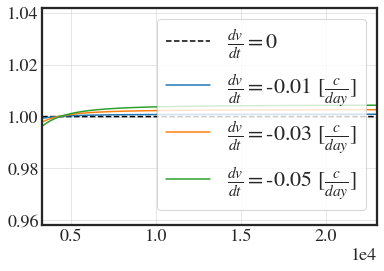

In [215]:
plt.plot(X[80:]*1e10, np.ones_like(X[80:]), label=r'$\frac{dv}{dt} = 0$', ls='--', color='k')

for deceleration in [-0.01, -0.03, -0.05]: 
    #vphot=0.3
    #vbb = vphot
    vphot = (t_0-t)/(3600*24)*deceleration+p[1]
    vphot_avg = np.average(vphot, weights=areas)
    corr = (1-vphot_avg**2)**(1/2)*1/(1-vphot_avg*np.cos(x_center))
    
    corr2 =  (1-vphot**2)**(1/2)*1/(1-vphot*np.cos(x_center))
    ratio = np.average([temp(X*i, T) for i in corr2], axis=0, weights=areas)/np.average([temp(X*i, T) for i in corr], axis=0, weights=areas)

    plt.plot(X[80:]*1e10, ratio[80:], label=r'$\frac{dv}{dt} = $'+str(deceleration)+r' $[\frac{c}{day}]$')
    print(np.average(ratio[130:]))
    
plt.ylim(0.958, 1.042)
plt.xlim(3300, 23000)
plt.legend(frameon=True)


1.0014669684877204
1.0074330591775744
1.0215428159208728
1.0015161041873961
1.005960185592274
1.013183356157445
1.0006853216530707
1.0019817521910084
1.0031938375450287


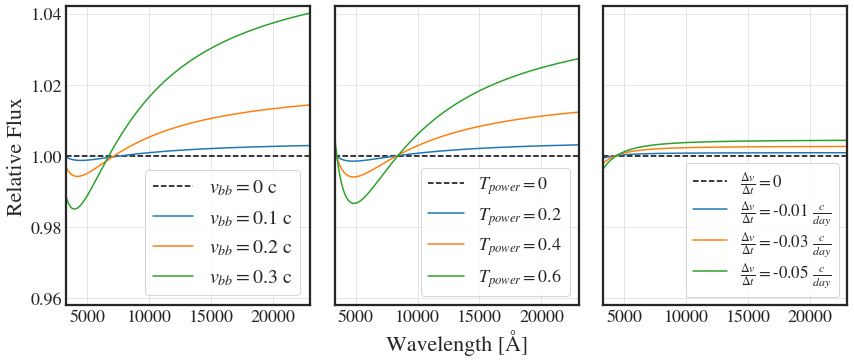

In [223]:
T = 5000

fig,ax = plt.subplots(figsize=(14,5.5), ncols=3, sharey=True)

ax[0].plot(X[80:]*1e10, np.ones_like(X[80:]), label=r'$v_{bb} = 0 $ c', ls='--', color='k')
for vphot in [0.1,0.2,0.3]: 
    corr = (1-vphot**2)**(1/2)*1/(1-vphot*np.cos(x_center))
    ratio = np.average([temp(X*i, T) for i in corr], axis=0, weights=areas)/temp(X*np.average(corr,weights=areas), T)

    ax[0].plot(X[80:]*1e10, ratio[80:], label=r'$v_{bb} = $'+str(vphot)+' c')
    print(np.average(ratio[130:]))

ax[0].legend(fontsize=20, frameon=True)
ax[0].ticklabel_format(axis="x", style="plain", scilimits=(0,0))
ax[1].ticklabel_format(axis="x", style="plain", scilimits=(0,0))
ax[2].ticklabel_format(axis="x", style="plain", scilimits=(0,0))
plt.ylim(0.958, 1.042)

ax[0].set_ylabel('Relative Flux'), ax[1].set_xlabel('Wavelength [Å]')


ax[1].plot(X[80:]*1e10, np.ones_like(X[80:]), label=r'$T_{power} = 0 $', ls='--', color='k')
for t_power in [0.2, 0.4, 0.6]: 
    vphot=0.3
    vbb = vphot

    corr = (1-vphot**2)**(1/2)*1/(1-vphot*np.cos(x_center))
    
    #This includes the cooling of temperatures using Drout2017
    t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
    #T_n = T*np.ones_like(t) #
    T_n = T*((t_0-t)/t_0)**(-t_power)
    corr2 =  ((T_n/T)/np.average(T_n/T)) #*corr
    ratio = np.average([temp(X*i, T) for i in corr2], axis=0, weights=areas)/temp(X*np.average(corr2,weights=areas), T)

    ax[1].plot(X[80:]*1e10, ratio[80:], label=r'$T_{power} = $'+str(t_power))
    print(np.average(ratio[130:]))

ax[1].set_xlim(3300, 23000)#, plt.yticks([]), #, plt.ylim(0.95, 1.05)
ax[0].set_xlim(3300, 23000)
plt.subplots_adjust(wspace=0.1)
ax[1].legend(fontsize=18, frameon=True)


plt.plot(X[80:]*1e10, np.ones_like(X[80:]), label=r'$\frac{\Delta v}{\Delta t} = 0$', ls='--', color='k')
for deceleration in [-0.01, -0.03, -0.05]: 
    #vphot=0.3
    #vbb = vphot
    vphot = (t_0-t)/(3600*24)*deceleration+p[1]
    vphot_avg = np.average(vphot, weights=areas)
    
    corr = (1-vphot_avg**2)**(1/2)*1/(1-vphot_avg*np.cos(x_center))
    
    corr2 =  (1-vphot**2)**(1/2)*1/(1-vphot*np.cos(x_center))
    ratio = np.average([temp(X*i, T) for i in corr2], axis=0, weights=areas)/np.average([temp(X*i, T) for i in corr], axis=0, weights=areas)

    plt.plot(X[80:]*1e10, ratio[80:], label=r'$\frac{\Delta v}{\Delta t} = $'+str(deceleration)+r' $\frac{c}{day}$')
    print(np.average(ratio[130:]))
    
plt.ylim(0.958, 1.042)
plt.xlim(3300, 23000)
plt.legend(fontsize=17, frameon=True, labelspacing=0.1, loc=4)

#plt.savefig('Pictures/Convolved_BB_example_ratio_4.png', dpi=300)

In [201]:
corr2

array([0.83763814, 0.83796574, 0.83861974, 0.83959772, 0.84089604,
       0.84250984, 0.84443308, 0.84665846, 0.84917749, 0.85198048,
       0.85505651, 0.85839351, 0.86197819, 0.86579616, 0.86983191,
       0.87406883, 0.87848935, 0.88307489, 0.88780604, 0.89266256,
       0.89762355, 0.90266751, 0.90777246, 0.91291613, 0.91807601,
       0.92322957, 0.92835438, 0.93342829, 0.93842956, 0.94333704,
       0.94813034, 0.95278996, 0.95729742, 0.96163546, 0.9657881 ,
       0.96974076, 0.97348039, 0.97699551, 0.98027627, 0.98331453,
       0.98610381, 0.98863937, 0.99091814, 0.99293869, 0.99470121,
       0.99620741, 0.99746046, 0.99846489, 0.99922651])

1.0006449747975754
1.0027800114935963
1.006137187257057


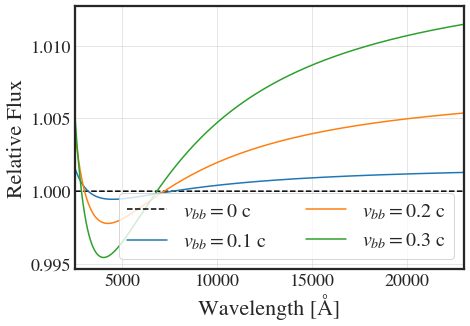

In [171]:
plt.figure(figsize=(7,5))
plt.plot(X[80:]*1e10, np.ones_like(X[80:]), label=r'$v_{bb} = 0 $ c', ls='--', color='k')

for vphot in [0.1, 0.2, 0.3]: 
    corr = (1-vphot**2)**(1/2)*1/(1-vphot*np.cos(x_center))
    
    vbb = vphot
    #This includes the cooling of temperatures using Drout2017
    t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
    #T_n = T*np.ones_like(t) #
    T_n = T*((t_0-t)/t_0)**(-0.3)
    corr2 = corr * ((T_n/4500)/np.average(T_n/4500))
    ratio = np.average([temp(X*i, 5000) for i in corr2], axis=0, weights=areas)/temp(X*np.average(corr2,weights=areas), 5000)

    plt.plot(X[80:]*1e10, ratio[80:], label=r'$v_{bb} = $'+str(vphot)+' c')
    print(np.average(ratio[130:]))
plt.xlabel('Wavelength [Å]'), plt.ylabel('Relative Flux'), plt.tight_layout() 
#plt.axvline(4000, ls='--', color='k')
plt.xlim(2500, 23000)#, plt.ylim(0.95, 1.05)

plt.legend(fontsize=20, frameon=True, ncol=2)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))

#plt.savefig('Pictures/Convolved_BB_example_ratio_new.png', dpi=300)

In [168]:
corr

array([1.36269527, 1.36209553, 1.36089825, 1.35910781, 1.35673071,
       1.35377557, 1.35025299, 1.34617549, 1.34155743, 1.33641486,
       1.33076538, 1.32462805, 1.31802319, 1.31097229, 1.30349777,
       1.29562292, 1.28737167, 1.27876846, 1.26983811, 1.26060564,
       1.25109615, 1.24133469, 1.23134613, 1.22115505, 1.21078562,
       1.20026153, 1.18960589, 1.17884115, 1.16798907, 1.15707062,
       1.14610595, 1.13511438, 1.12411433, 1.11312335, 1.10215805,
       1.09123416, 1.08036648, 1.0695689 , 1.05885444, 1.04823522,
       1.03772253, 1.02732681, 1.01705771, 1.00692409, 0.99693408,
       0.98709508, 0.97741382, 0.96789639, 0.95854824])

In [169]:
corr2

array([1.21170102, 1.21157915, 1.21133598, 1.2109726 , 1.21049066,
       1.20989235, 1.20918036, 1.20835787, 1.20742853, 1.20639647,
       1.20526617, 1.20404256, 1.20273086, 1.20133666, 1.19986578,
       1.19832431, 1.19671854, 1.19505491, 1.19334   , 1.1915805 ,
       1.18978311, 1.1879546 , 1.1861017 , 1.1842311 , 1.18234944,
       1.18046321, 1.17857883, 1.17670253, 1.17484039, 1.17299827,
       1.17118185, 1.16939656, 1.16764761, 1.16593993, 1.1642782 ,
       1.16266683, 1.16110995, 1.1596114 , 1.15817472, 1.15680316,
       1.15549969, 1.15426695, 1.15310731, 1.15202281, 1.15101523,
       1.15008602, 1.14923635, 1.14846709, 1.14777884])

In [170]:
((T_n/4500)/np.average(T_n/4500))

array([0.88919441, 0.88949646, 0.89010033, 0.89100555, 0.89221144,
       0.89371708, 0.89552134, 0.89762284, 0.90002001, 0.90271106,
       0.90569397, 0.90896653, 0.91252633, 0.91637075, 0.92049699,
       0.92490206, 0.92958278, 0.9345358 , 0.93975759, 0.94524446,
       0.95099254, 0.95699782, 0.96325612, 0.9697631 , 0.97651427,
       0.983505  , 0.9907305 , 0.99818583, 1.00586591, 1.0137655 ,
       1.02187922, 1.03020152, 1.03872673, 1.04744899, 1.05636228,
       1.06546044, 1.07473712, 1.08418579, 1.09379975, 1.10357212,
       1.11349581, 1.12356354, 1.13376783, 1.14410095, 1.15455501,
       1.16512182, 1.17579302, 1.18655996, 1.19741375])